## **Which team metrics exhibit the highest correlation with regular season wins in the NBA?**
**Group Big B:** Braulio Duran (bdura2), Isabella Linarez (ilina2), Basim Nabulsi (basimsn2), Moe Abuseini (mabus3), Sebastian Kowalczyk (skowa3)

### Introduction
We're analyzing a comprehensive set of data from previous NBA seasons that is sourced from [Basketball Reference](https://www.basketball-reference.com/) that show team metrics per season which are outlined in Glossary within the Data Cleaning section. These data charts present a summary of team statistics from a basketball league, featuring multiple teams over a season of 82 games.

By examining this vast dataset, we hope to uncover key performance indicators that teams should prioritize for success. While there are factors beyond statistical analysis that influence a team's performance, we believe that analyzing will provide valuable insights.
###### Data Source Links: https://www.basketball-reference.com/leagues/NBA_2021.html, https://www.basketball-reference.com/leagues/NBA_2022.html, https://www.basketball-reference.com/leagues/NBA_2023.html

### Data Cleaning
Cleaning methods on csv files:
- Manually added the W/L% from other tables
- removed "*" from respective team names manually 
- removed the last column (as league averages were insignificant to analysis)

The CSV files had no null values and were relatively clean in respect to the analysis.

Creating a dataframe with all data from the cleaned csv files and differentiating them by ending year:


In [1]:
# Adding proper imports for data processing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import myFunctions
from scipy.stats import pearsonr

# Data Cleaning
df_season1 = myFunctions.clean_data('2022-23.csv')
df_season2 = myFunctions.clean_data('2021-22.csv')
df_season3 = myFunctions.clean_data('2020-21.csv')
df_season1['YR'] = 2021  
df_season2['YR'] = 2022  
df_season3['YR'] = 2023  

merged_df = pd.concat([df_season1, df_season2, df_season3], ignore_index=True)

#### Glossary for DataFrames
| Abbreviation | Definition                       | Abbreviation | Definition               | Abbreviation | Definition               | Abbreviation | Definition               |
|--------------|----------------------------------|--------------|--------------------------|--------------|--------------------------|--------------|--------------------------|
| Rk           | Rank                             | G            | Games                    | MP           | Minutes Played           | FG           | Field Goals              |
| FGA          | Field Goal Attempts              | FG%          | Field Goal Percentage    | 3P           | 3-Point Field Goals      | 3PA          | 3-Point FG Attempts      |
| 3P%          | 3-Point FG Percentage            | 2P           | 2-Point FG               | 2PA          | 2-Point FG Attempts      | 2P%          | 2-Point FG Percentage    |
| FT           | Free Throws                      | FTA          | Free Throw Attempts      | FT%          | Free Throw Percentage    | ORB          | Offensive Rebounds       |
| DRB          | Defensive Rebounds               | TRB          | Total Rebounds           | AST          | Assists                  | STL          | Steals                   |
| BLK          | Blocks                           | TOV          | Turnovers                | PF           | Personal Fouls           | PTS          | Points                   |
| W/L%         | Win to Loss Percentage           | YR           | Year                     |              |                          |              |                          |


### EDA and Visualizations
The code below performs exploratory data analysis (EDA) on team metrics across seasons ending in 2021-2023, while utilizing **find_most_important_metric** to calculate the average correlation of team metrics with win/loss percentage (W/L%). 

Positive correlations are observed for metrics associated with scoring points, while turnovers (TOV) show a moderate negative correlation with win/loss percentage (W/L%).

Team Metric Averages for Seasons 2021-2023
3P%    0.789905
FG%    0.691194
PTS    0.621528
2P%    0.560542
FG     0.487685
Name: W/L%, dtype: float64
The most important metric for W/L% is: 3P%


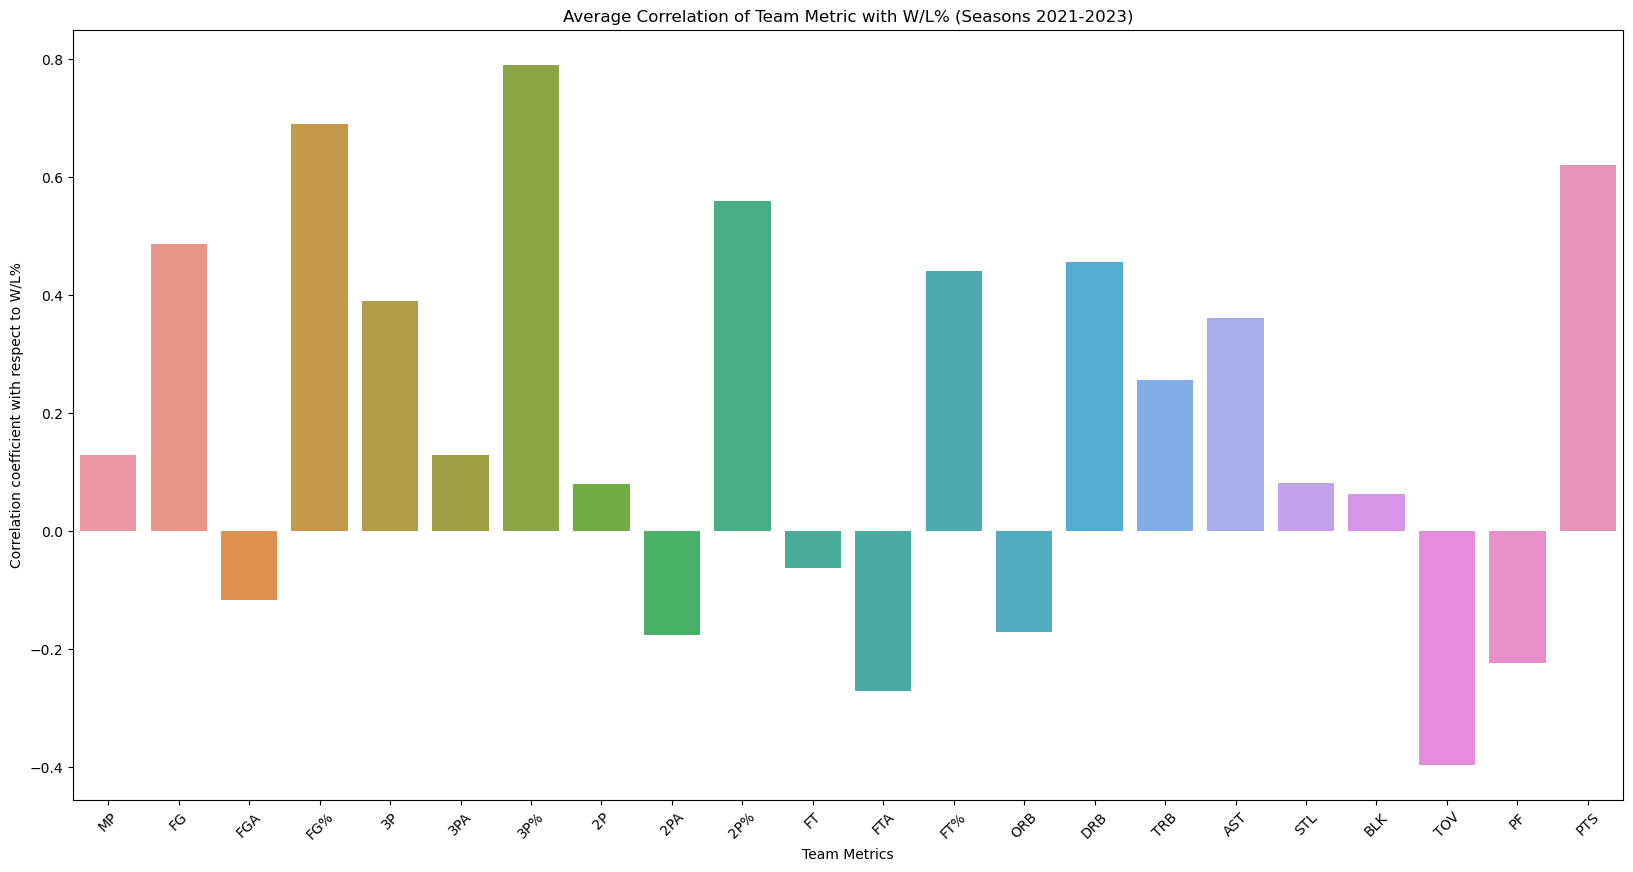

In [11]:
EDA_data = merged_df.copy()
EDA_data = EDA_data.groupby('Team').mean().reset_index()
EDA_data.drop('YR', axis=1, inplace=True)

print("Team Metric Averages for Seasons 2021-2023")
avg_correlation_with_WL = myFunctions.find_most_important_metric(EDA_data)

myFunctions.bar_plot_correlation(avg_correlation_with_WL, 'Average Correlation of Team Metric with W/L% (Seasons 2021-2023)')

This bar plot confirmed significant correlations between key performance metrics, such as how 3PA, 2P%, TOV, PTS all correlate to W/L% in NBA seasons. This suggests that teams focusing on enhancing their shooting efficiency and reducing turnovers are more likely to achieve higher win percentages

#### **Hypothesis 1:** Teams with higher shooting percentages (FG%) tend to have a higher win percentage.

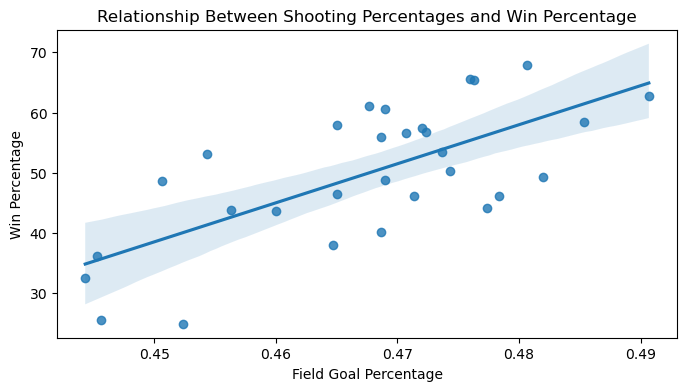

In [12]:
selected_data = merged_df.groupby('Team')[['FG%', 'W/L%']].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.regplot(data=selected_data, x='FG%', y='W/L%')
plt.title('Relationship Between Shooting Percentages and Win Percentage')
plt.xlabel('Field Goal Percentage')
plt.ylabel('Win Percentage')
plt.show()

This plot visualizes the relationship between shooting efficiency, represented by Field Goal Percentage (FG%), and win percentage (W/L%) for each team. Each point on the scatter plot represents a team, where the x-coordinate represents the average FG% and the y-coordinate represents the average win percentage. Additionally, a regression line is included to show the overall trend between FG% and W/L%. The regression line is linear and increasing, which indicates a positive correlation between the field goal percentage and the win percentage. 

#### **Hypothesis 2:** Teams that have more turnovers (TOV) have a lower win percentage

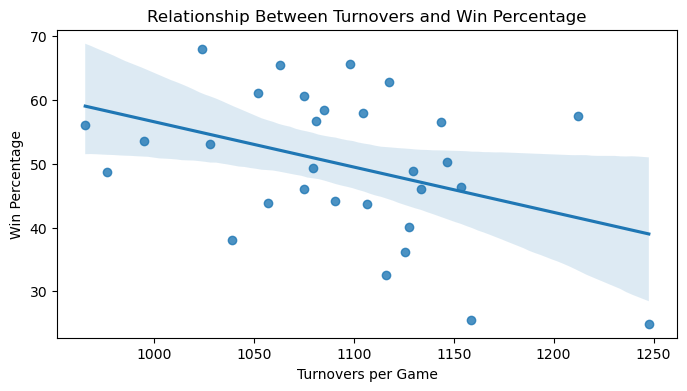

In [4]:
selected_data = merged_df[['Team', 'TOV', 'W/L%', 'YR']].copy()
selected_data = selected_data.groupby('Team')[['TOV', 'W/L%']].mean().reset_index()
plt.figure(figsize=(8, 4))
sns.regplot(data=selected_data, x='TOV', y='W/L%')
plt.title('Relationship Between Turnovers and Win Percentage')
plt.xlabel('Turnovers per Game')
plt.ylabel('Win Percentage')
plt.show()

This plot visualizes the relationship between turnovers, represented by Turnoves per Game (TOV), and win percentage (W/L%) for each team. Each point on the scatter plot represents a team, where the x-coordinate represents the TOV and the y-coordinate represents the average win percentage. Additionally, a regression line is included to show the overall trend between TOV and W/L%. The regression line is linear and decreasing, which indicates a negative correlation between the turnoves per game and the win percentage.

### ML Analysis
We utilized a *Logistic Regression model* to categorize win/loss percentages into binary outcomes ('Winning' or 'Losing') using a threshold (51%) on the recent 23-24 season.

Additionally, we conducted feature selection to identify pertinent features ('3P%', 'PTS', 'FG%', 'DRB', 'FT') and the target variable *('W/L%')* for training the LR model.

The dataset was split into training and testing sets using train_test_split, features were standardized with StandardScaler, and trained the logistic regression model on the training data using LogisticRegression() from scikit-learn. The feature selection, and training of the model were conducted on the first half of the season(40 games per team).

After training the model, we made predictions on the testing set(the second half of the season) using model.predict(X_test) and calculated the accuracy of the model. Which received an accuracy of 90%, signifying a rather strong correlation between either a winning or losing record and said team metrics. 

For our baseline classifier, we simply used a Dummy classifier on the mode of the binary W/L which had an accuracy of around 50%.

In [5]:
df_first_half = myFunctions.clean_season_halfs('24-1.csv')
df_second_half = myFunctions.clean_season_halfs('24-2.csv')
myFunctions.train_and_predict(df_first_half, df_second_half)

3P%    0.730653
PTS    0.587344
FG%    0.577295
DRB    0.565606
FT     0.543372
Name: W/L%, dtype: float64
The most important metric for W/L% is: 3P%
Accuracy: 0.9
Dummy Accuracy: 0.5


### Hypothesis Testing
**Hypothesis 1:**
Teams with higher shooting percentages (FG%) tend to have a higher win percentage.

Null Hypothesis (H0): There is no significant correlation between field goal percentage (FG%) and win percentage (W/L%).

Alternative Hypothesis (H1): There is a significant positive correlation between field goal percentage (FG%) and win percentage (W/L%).

To test this hypothesis, we'll perform Pearson correlation coefficient analysis and conduct a significance test with a significance level (α) of 0.05.

In [6]:
# Extract relevant data
shooting_percentage = merged_df['FG%']
win_percentage = merged_df['W/L%']

# Calculate Pearson correlation coefficient and p-value
corr, p_value = pearsonr(shooting_percentage, win_percentage)

# Output results
print("Pearson Correlation Coefficient:", corr)
print("P-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant positive correlation between FG% and W/L%.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between FG% and W/L%.")


Pearson Correlation Coefficient: 0.6072987985155592
P-value: 2.2087444436113241e-10
Reject the null hypothesis. There is a significant positive correlation between FG% and W/L%.


**Results and Interpretation:** The Pearson correlation coefficient between field goal percentage (FG%) and win percentage (W/L%) is calculated, along with the p-value. Based on the significance level of 0.05, we can determine that we should reject the null hypothesis. The Pearson correlation coefficient of 0.607 indicates a strong positive linear relationship between FG% and W/L% meaning teams with higher field goal percentages tend to have higher win percentages, suggesting that shooting efficiency plays a crucial role in determining team success in the NBA regular season. 


**Hypothesis 2:** Teams with higher three-point shooting percentages (3PT%) tend to have a higher win percentage.

Null Hypothesis (H0): There is no significant correlation between three-point shooting percentage (3PT%) and win percentage (W/L%).

Alternative Hypothesis (H1): There is a significant positive correlation between three-point shooting percentage (3PT%) and win percentage (W/L%).

We'll again use the Pearson correlation coefficient analysis and conduct a significance test with a significance level (α) of 0.05.

In [7]:
# Extract relevant data
three_point_percentage = merged_df['3P%']

# Calculate Pearson correlation coefficient and p-value
corr_3pt, p_value_3pt = pearsonr(three_point_percentage, win_percentage)

# Output results
print("Pearson Correlation Coefficient (3PT% vs. W/L%):", corr_3pt)
print("P-value (3PT% vs. W/L%):", p_value_3pt)

# Interpret results
if p_value_3pt < 0.05:
    print("Reject the null hypothesis. There is a significant positive correlation between 3PT% and W/L%.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between 3PT% and W/L%.")


Pearson Correlation Coefficient (3PT% vs. W/L%): 0.6663583603919213
P-value (3PT% vs. W/L%): 7.60410745956206e-13
Reject the null hypothesis. There is a significant positive correlation between 3PT% and W/L%.


**Results and Interpretation:** Based on the Pearson correlation coefficient of approximately 0.666 and the very low p-value (7.604e-13), we reject the null hypothesis. This indicates a significant positive correlation between three-point shooting percentage (3PT%) and win percentage (W/L%). The strong positive correlation between three-point shooting percentage and win percentage suggests that teams with higher three-point shooting efficiency tend to have higher win percentages in NBA regular season games. This finding has important implications for team strategies, player development, and recruitment, highlighting the importance of three-point shooting in achieving success in basketball. 

### Overall Results
Overall our findings conclude that metrics such as 3PT%, 3PA, FG% all contribute towards team success and team wins.